## Problem Statement
- Perform a basic exploratory data analysis of the features of the Unicorn Companies dataset and come up with at least FOUR (4) data driven overall recommendations to help Unicorn Companies in creating good business models and making decisions that will focus on companies with high growth potential, diversify investment portfolio and prioritize companies with experienced leadership teams.

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import and read file
df = pd.read_csv(r"D:\daf\Python\Assignment\Unicorn_Companies.csv", encoding='utf-8') # pd.read_excel()
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


## Data Inspection

In [25]:
# shape of data
df.shape

(1074, 10)

In [26]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [27]:
# Check for missing values
print(df.isnull().sum())

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64


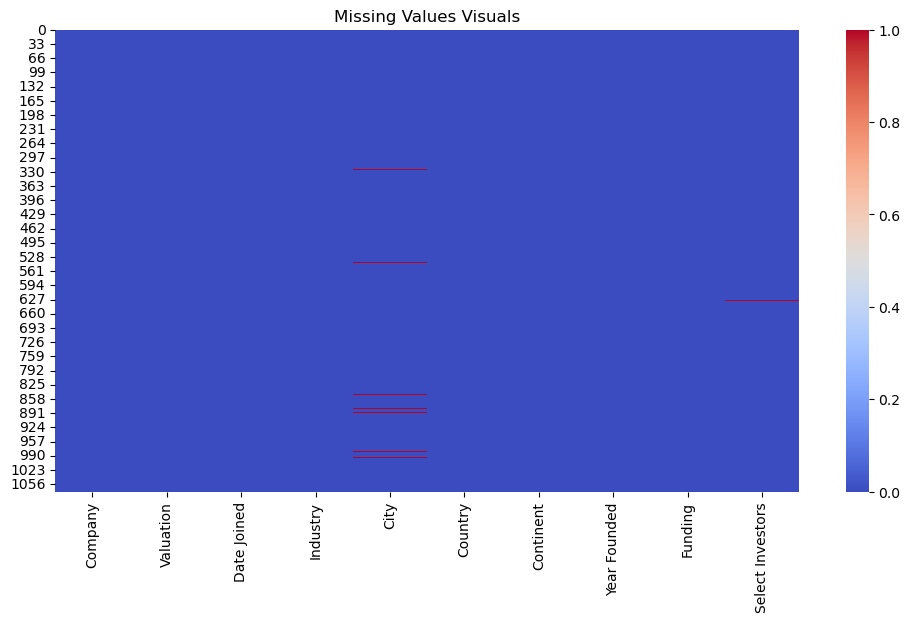

In [28]:
# visualize missing values
plt.figure(figsize = (12, 6))
sns.heatmap(df.isnull(), cbar = True, cmap = 'coolwarm')
plt.title('Missing Values Visuals')
plt.show()

In [29]:
# check columns
df.columns.tolist()

['Company',
 'Valuation',
 'Date Joined',
 'Industry',
 'City',
 'Country',
 'Continent',
 'Year Founded',
 'Funding',
 'Select Investors']

# Data Cleaning and Manipulation

In [30]:
# Clean Valuation column
df['Valuation'] = df['Valuation'].str.replace('$', '').str.replace('B', '').astype(float)

In [31]:
# Display Valuation records
df['Valuation']

0       180.0
1       100.0
2       100.0
3        95.0
4        46.0
        ...  
1069      1.0
1070      1.0
1071      1.0
1072      1.0
1073      1.0
Name: Valuation, Length: 1074, dtype: float64

In [21]:
# Replace Unknown from Funding Column with NaN
df['Funding'] = df['Funding'].replace('Unknown', np.nan)

In [22]:
# Clean Funding column
df['Funding'] = df['Funding'].str.replace('$', '').str.replace('B', '').str.replace('M', '').astype(float)

In [7]:
# Replace "Artificial intelligence" with "Artificial Intelligence" in the Industry column
df['Industry'] = df['Industry'].replace('Artificial intelligence', 'Artificial Intelligence')

In [35]:
# Display Funding records
df['Funding']

0         8.0
1         7.0
2         2.0
3         2.0
4         4.0
        ...  
1069    379.0
1070    990.0
1071     80.0
1072    792.0
1073    620.0
Name: Funding, Length: 1074, dtype: float64

In [12]:
# Convert Date Joined to datetime format
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [13]:
# Extract Year from Date Joined
df['Year Joined'] = df['Date Joined'].dt.year

In [14]:
# Display the cleaned dataset
print(df.head())

     Company Valuation Date Joined                         Industry  \
0  Bytedance     $180B  2017-04-07          Artificial Intelligence   
1     SpaceX     $100B  2012-12-01                            Other   
2      SHEIN     $100B  2018-07-03  E-commerce & direct-to-consumer   
3     Stripe      $95B  2014-01-23                          Fintech   
4     Klarna      $46B  2011-12-12                          Fintech   

            City        Country      Continent  Year Founded Funding  \
0        Beijing          China           Asia          2012     $8B   
1      Hawthorne  United States  North America          2002     $7B   
2       Shenzhen          China           Asia          2008     $2B   
3  San Francisco  United States  North America          2010     $2B   
4      Stockholm         Sweden         Europe          2005     $4B   

                                    Select Investors  Year Joined  
0  Sequoia Capital China, SIG Asia Investments, S...         2017  
1  F

In [39]:
# info of the cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1062 non-null   float64       
 9   Select Investors  1073 non-null   object        
 10  Year Joined       1074 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6)
memory usage: 88.2+ KB


## Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

In [40]:
# statistical summary of the data
df.describe()

,Valuation,Date Joined,Year Founded,Funding,Year Joined
count,1074.000000,1074,1074.000000,1062.000000,1074.000000
mean,3.455307,2020-05-19 15:35:51.955307264,2012.895717,338.091337,2019.896648
min,1.000000,2007-07-02 00:00:00,1919.000000,0.000000,2007.000000
25%,1.000000,2019-05-20 06:00:00,2011.000000,166.000000,2019.000000
50%,2.000000,2021-03-29 00:00:00,2014.000000,300.000000,2021.000000
75%,3.000000,2021-09-19 18:00:00,2016.000000,491.500000,2021.000000
max,180.000000,2022-04-05 00:00:00,2021.000000,999.000000,2022.000000
std,8.547022,NaN,5.698573,237.333149,2.001288


In [57]:
# Top Valued companies
companies = df.nlargest(5, 'Valuation')
print(companies[['Company', 'Valuation']])


     Company  Valuation
0  Bytedance      180.0
1     SpaceX      100.0
2      SHEIN      100.0
3     Stripe       95.0
4     Klarna       46.0


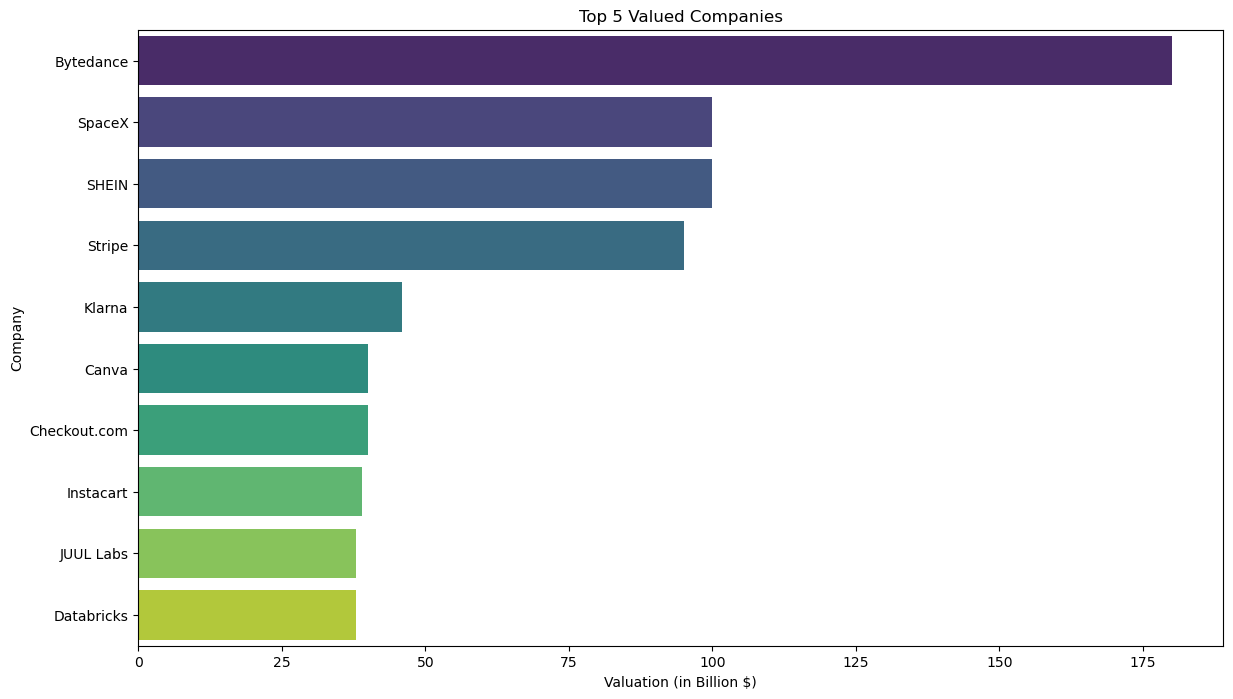

In [60]:
# Select the top 10 valued companies
top_valued_companies = df.nlargest(10, 'Valuation')

# Plot bar chart of top valued companies
plt.figure(figsize=(14, 8))
sns.barplot(x='Valuation', y='Company', data=top_valued_companies, palette='viridis')
plt.title('Top 5 Valued Companies')
plt.xlabel('Valuation (in Billion $)')
plt.ylabel('Company')
plt.show()


Bytedance is the most valued company, followed by SpaceX. Databricks is the least valued companies in the top 10

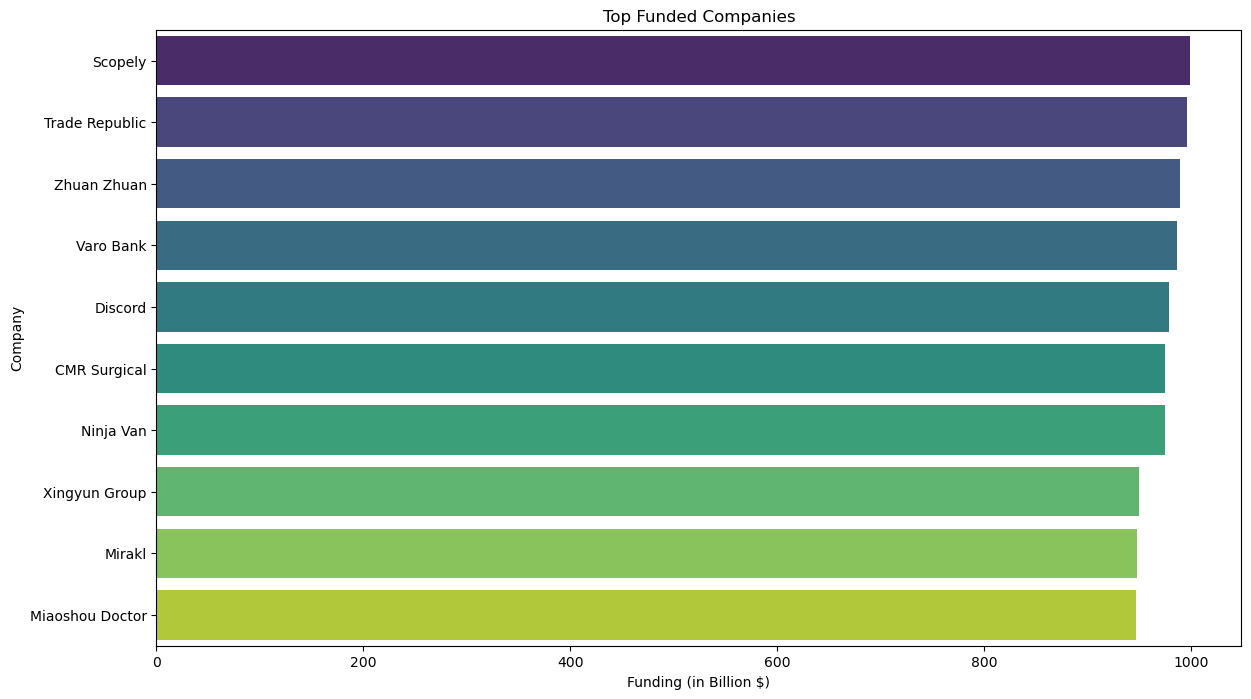

In [64]:
# Select the top 10 funded companies
top_funded_companies = df.nlargest(10, 'Funding')

# Plot bar chart of top funded companies
plt.figure(figsize=(14, 8))
sns.barplot(x='Funding', y='Company', data=top_funded_companies, palette='viridis')
plt.title('Top Funded Companies')
plt.xlabel('Funding (in Billion $)')
plt.ylabel('Company')
plt.show()


The most funded company is Scopely.

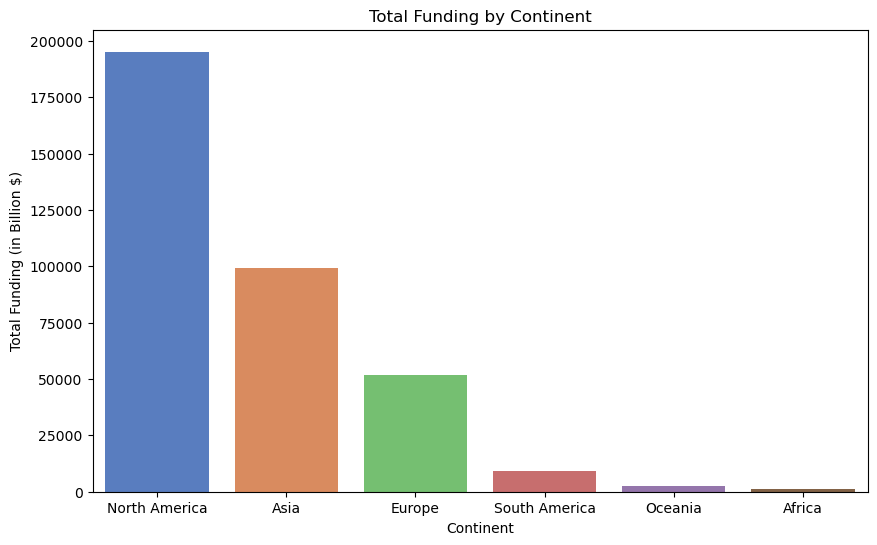

In [65]:
# Calculate total funding for each continent
continent_total_funding = df.groupby('Continent')['Funding'].sum().sort_values(ascending=False)

# Plot bar chart of total funding by continent
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_total_funding.index, y=continent_total_funding, palette='muted')
plt.title('Total Funding by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Funding (in Billion $)')
plt.show()


The most funded continent is North America while Africa is the least funded.

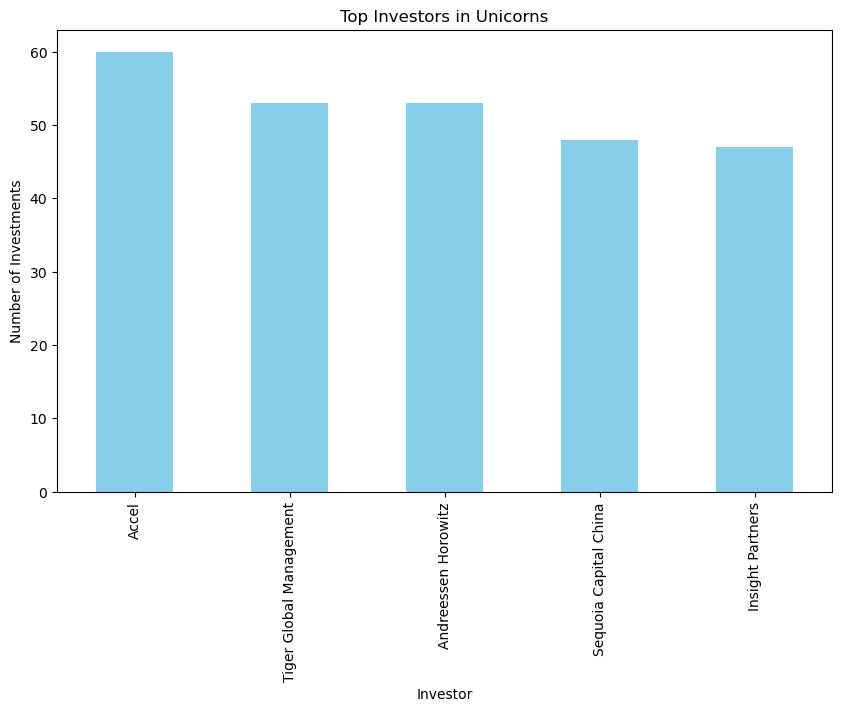

In [42]:
# Select top investors
investors = df['Select Investors'].str.split(', ').explode().value_counts().nlargest(5)

# Plot top investors
plt.figure(figsize=(10, 6))
investors.plot(kind='bar', color='skyblue')
plt.title('Top Investors in Unicorns')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.show()


Accel has invested most in Unicorn companies followed by Tiger Global Management. 

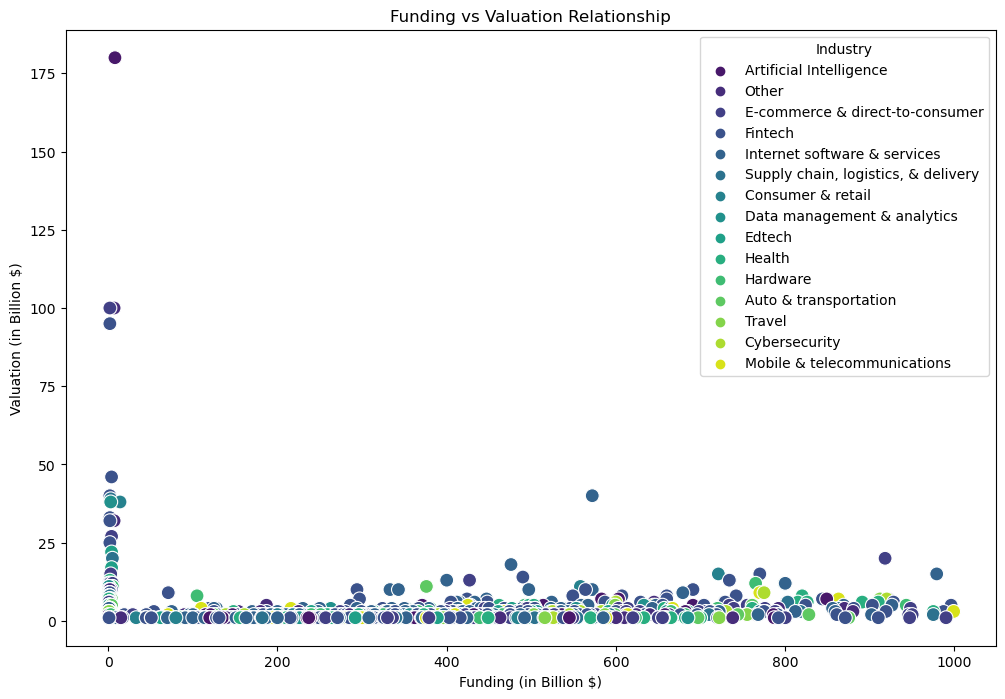

In [43]:
# Plot funding vs valuation relationship
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Funding', y='Valuation', data=df, hue='Industry', palette='viridis', s=100)
plt.title('Funding vs Valuation Relationship')
plt.xlabel('Funding (in Billion $)')
plt.ylabel('Valuation (in Billion $)')
plt.show()


The industries with higher funding tend to have higher valuations

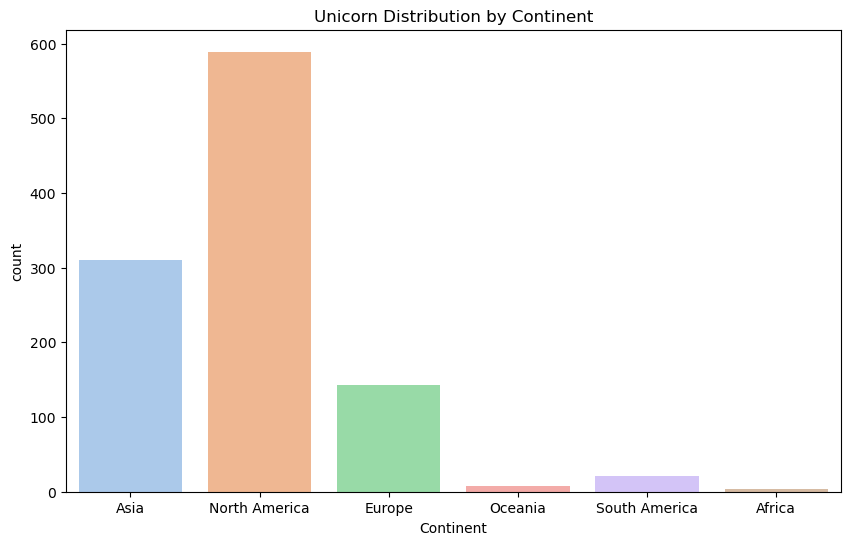

In [44]:
# Plot unicorn distribution by continent
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent', data=df, palette='pastel')
plt.title('Unicorn Distribution by Continent')
plt.show()


North America appears to have the highest number of unicorns, followed by Asia and Europe. This suggests that North America is a significant hub for unicorn companies.

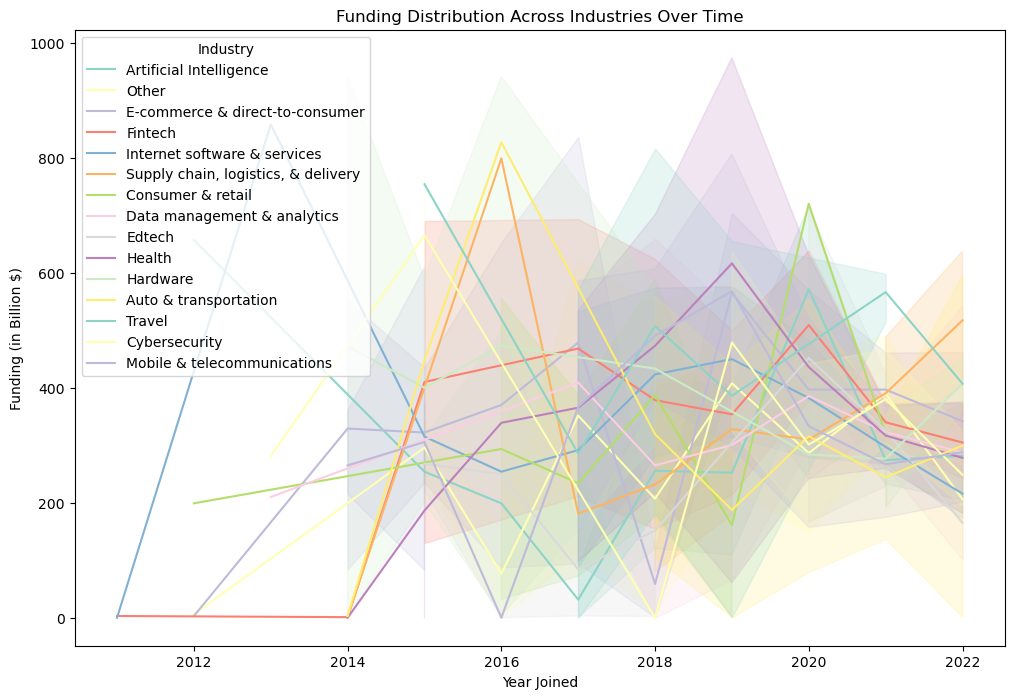

In [45]:
# 
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year Joined', y='Funding', hue='Industry', data=df, palette='Set3')
plt.title('Funding Distribution Across Industries Over Time')
plt.xlabel('Year Joined')
plt.ylabel('Funding (in Billion $)')
plt.show()


Funding amounts for unicorn companies increased over time, indicating a growing trend in investment and valuation.

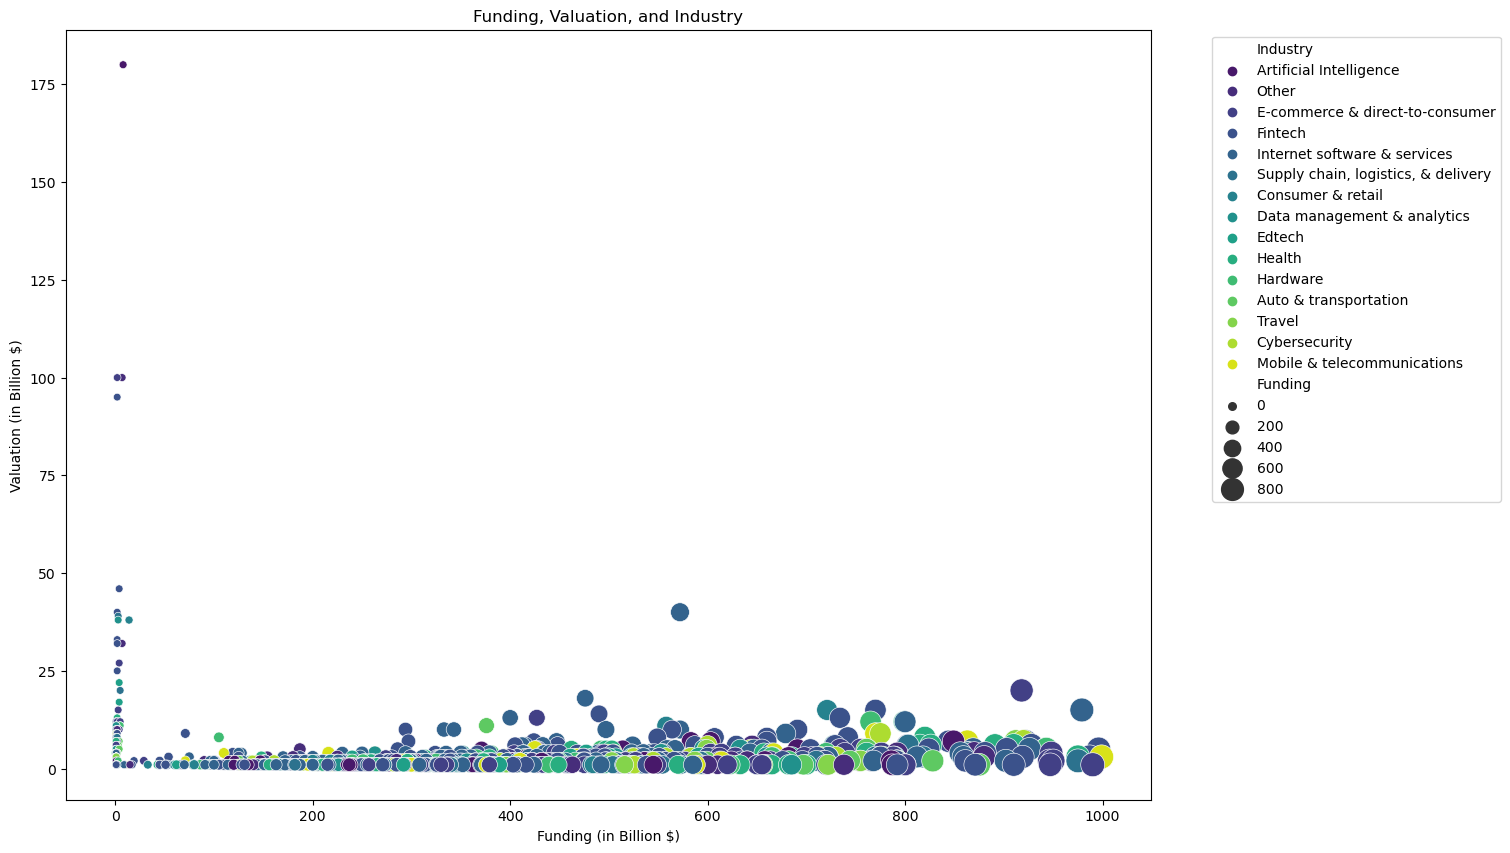

In [46]:
# Analysis of Funding, Valuation, and Industry
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Funding', y='Valuation', hue='Industry', size='Funding', sizes=(30, 300), data=df, palette='viridis')
plt.title('Funding, Valuation, and Industry')
plt.xlabel('Funding (in Billion $)')
plt.ylabel('Valuation (in Billion $)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


"E-commerce & direct-to-consumer" and "Fintech" industries have a wide distribution of valuations. This indicates variability in company sizes and market impact.

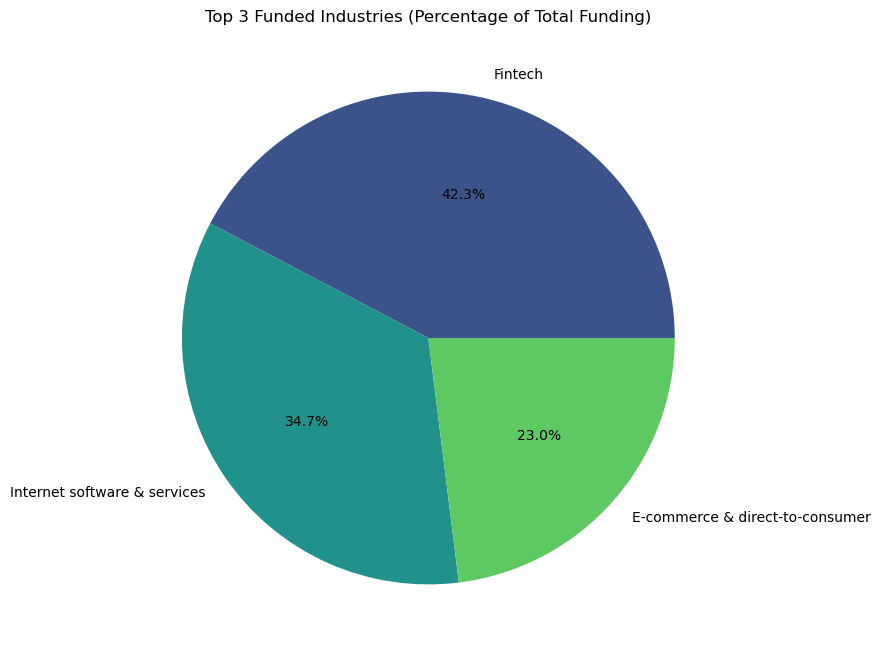

In [53]:
# Calculate total funding for each industry
industry_total_funding = df.groupby('Industry')['Funding'].sum().sort_values(ascending=False)

# Select the top 3 funded industries
top3_funded_industries = industry_total_funding.head(3)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top3_funded_industries, labels=top3_funded_industries.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=3))
plt.title('Top 3 Funded Industries (Percentage of Total Funding)')
plt.show()


Of the top 3 most funded industries, Fintech has the largest with 42.3%.

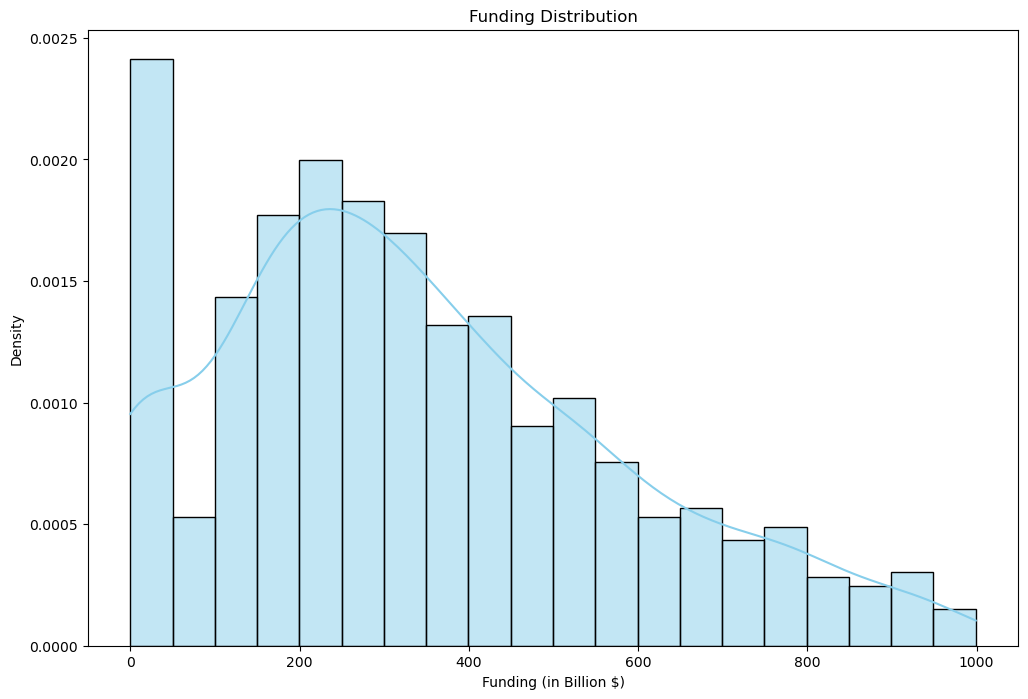

In [55]:
# Plot histogram of funding distribution
plt.figure(figsize=(12, 8))
sns.histplot(df['Funding'], bins=20, kde=True, color='skyblue', stat='density')
plt.title('Funding Distribution')
plt.xlabel('Funding (in Billion $)')
plt.ylabel('Density')
plt.show()


The distribution seems to be right-skewed. This means a majority of the Unicorn companies have relatively lower funding, compared to a smaller number that have higher funding amounts.

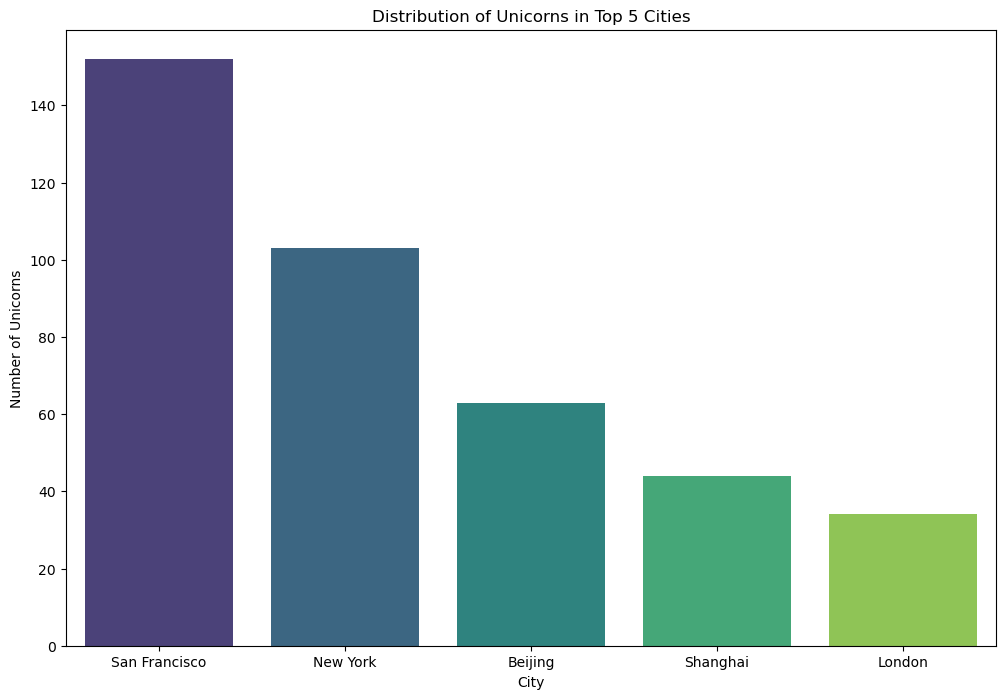

In [66]:
# Identify the top 5 cities with the most unicorns
top_cities = df['City'].value_counts().nlargest(5)

# Plot bar chart of the distribution of unicorns in the top 5 cities
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Distribution of Unicorns in Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Number of Unicorns')
plt.show()


San Francisco has the most Unicorns, followed by New York and Beijing City.

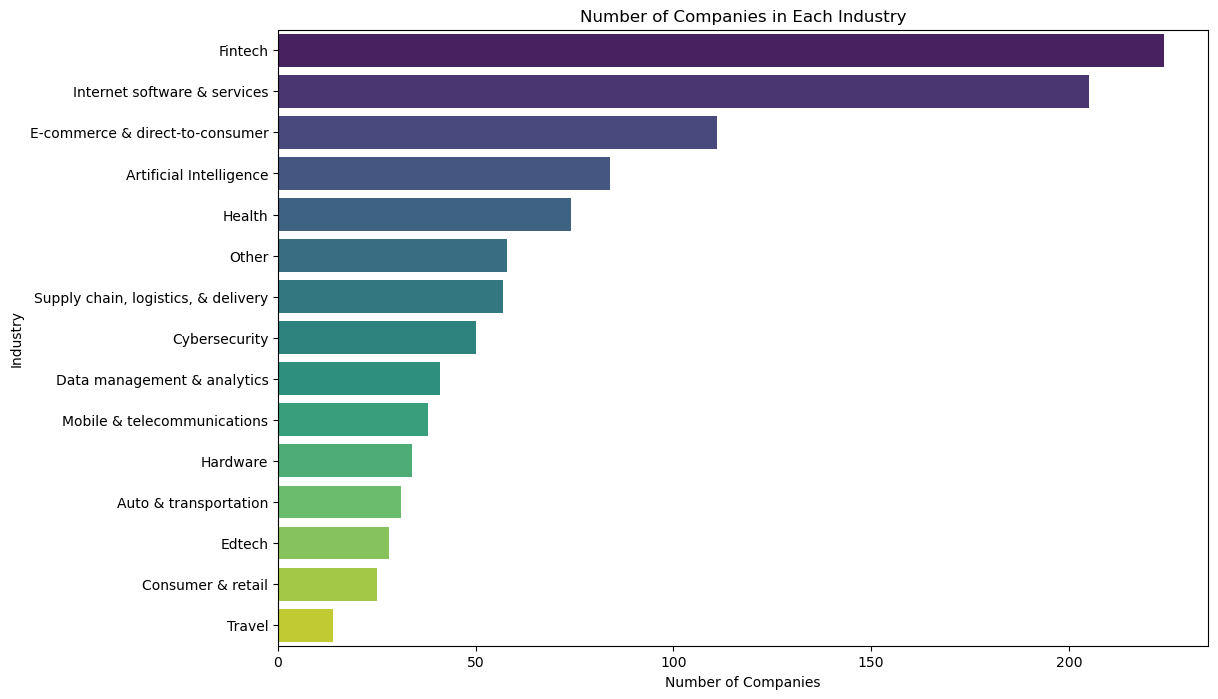

In [8]:
# Group by industry and count the number of companies
industry_counts = df['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Number of Companies']

# Plot bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Companies', y='Industry', data=industry_counts, palette='viridis')
plt.title('Number of Companies in Each Industry')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.show()

The Fintech industry has the highest number of Unicorn startups.

# Recommendation

The data shows that the USA has the highest number of Unicorns and fundings. This indicates that the country is the powerhouse of Tech Startups in the world.

Investors and entrepreneurs should always make strategic decision-making. They can do this by being informed by a thorough understanding of industry-specific dynamics, funding trends, and the evolving landscape of unicorn companies.

The African tech ecosystem needs to go back to the drawing board and maps out strategy to be on par with the other continents of the world.